A. Questions to answer

1. Subscriber Analysis:
    Who are the top 10 Channels as per Subscribers and As per Video Views.
   
2. Video Views Analysis:
    How do video views correlate with the number of subscribers?
    Do channels with more subscribers generally have more video views?
   
3. Uploads Analysis:
    Is there a relationship between the number of video uploads and the number of subscribers or video views?
    Do channels that upload more videos tend to have more subscribers or views?
   
4. Category Analysis:
    What are the most common categories among the top YouTube channels?
   
5. Subscriber Growth Analysis:
     Is there a correlation between recent subscriber growth and other variables?
   
6. Geographic Distribution:
     How does the urban population of a country correlate with the number of popular YouTube channels?
    
7. Economic Correlation:
    Is there a relationship between a country's unemployment rate and the number of popular YouTube channels?
    How does the gross tertiary education enrollment rate in a country correlate with the success of YouTube channels?
    
8. Channel Growth and Trends:
     How has the creation date of top YouTube channels evolved over time?
    
9. Additional Insights:
     Are there any patterns or clusters of popular YouTube channels based on geographic location (latitude and longitude)?
     What trends can be observed from the data regarding the overall growth of YouTube as a platform?

B. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import re

C. Data preparation and Cleaning

In [2]:
df=pd.read_csv('Youtube.csv')

In [3]:
df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [4]:
df.tail()

rank                  Youtuber  subscribers   video views  \
990   991             Natan por Aï¿     12300000  9.029610e+09   
991   992  Free Fire India Official     12300000  1.674410e+09   
992   993                     Panda     12300000  2.214684e+09   
993   994               RobTopGames     12300000  3.741235e+08   
994   995              Make Joke Of     12300000  2.129774e+09   

           category                     Title  uploads         Country  \
990          Sports             Natan por Aï¿     1200          Brazil   
991  People & Blogs  Free Fire India Official     1500           India   
992             NaN               HybridPanda     2452  United Kingdom   
993          Gaming               RobTopGames       39          Sweden   
994          Comedy              Make Joke Of       62           India   

    Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
990           BR  Entertainment  ...                      700000.0   
991           IN          Games  ...                      300000.0   
992           GB          Games  ...                        1000.0   
993           SE          Games  ...                      100000.0   
994           IN         Comedy  ...                      100000.0   

     created_year  created_month  created_date  \
990        2017.0            Feb          12.0   
991        2018.0            Sep          14.0   
992        2006.0            Sep          11.0   
993        2012.0            May           9.0   
994        2017.0            Aug           1.0   

     Gross tertiary education enrollment (%)    Population  Unemployment rate  \
990                                     51.3  2.125594e+08              12.08   
991                                     28.1  1.366418e+09               5.36   
992                                     60.0  6.683440e+07               3.85   
993                                     67.0  1.028545e+07               6.48   
994                                     28.1  1.366418e+09               5.36   

     Urban_population   Latitude  Longitude  
990       183241641.0 -14.235004 -51.925280  
991       471031528.0  20.593684  78.962880  
992        55908316.0  55.378051  -3.435973  
993         9021165.0  60.128161  18.643501  
994       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [6]:
#checking for null values
df.isnull().sum() / len(df)*100

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
Abbreviation                               12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
video_views_for_the_last_30_days            5.628141
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
subscribers_for_last_30_days               33.

In [7]:
#standardizing string data for easier operations
for i in df.columns :
    if df[i].dtype == 'O' :
        df[i] = df[i].str.lower()

df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    t-series    245000000  2.280000e+11   
1     2              youtube movies    170000000  0.000000e+00   
2     3                     mrbeast    166000000  2.836884e+10   
3     4  cocomelon - nursery rhymes    162000000  1.640000e+11   
4     5                   set india    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             music                    t-series    20082          india   
1  film & animation               youtubemovies        1  united states   
2     entertainment                     mrbeast      741  united states   
3         education  cocomelon - nursery rhymes      966  united states   
4             shows                   set india   116536          india   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           in          music  ...                     2000000.0   
1           us          games  ...                           NaN   
2           us  entertainment  ...                     8000000.0   
3           us      education  ...                     1000000.0   
4           in  entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            mar          13.0   
1        2006.0            mar           5.0   
2        2012.0            feb          20.0   
3        2006.0            sep           1.0   
4        2006.0            sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [8]:
df.shape

(995, 28)

In [9]:
#checking for duplicates
df.duplicated().sum()

0

In [10]:
#removing columns that are not very useful
df.drop(['Abbreviation',
         'video_views_for_the_last_30_days',
         'subscribers_for_last_30_days',
         'created_month',
         'created_date'],
          inplace=True, axis=1)
df.isnull().sum() / len(df) * 100

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
created_year                                0.502513
Gross tertiary education enrollment (%)    12.361809
Population                                 12.

In [11]:
#removing rows where country column has null values
df.drop(df[df['Country'].isnull()].index, inplace = True)
df.isnull().sum() / len(df)*100

rank                                       0.000000
Youtuber                                   0.000000
subscribers                                0.000000
video views                                0.000000
category                                   4.467354
Title                                      0.000000
uploads                                    0.000000
Country                                    0.000000
channel_type                               0.801833
video_views_rank                           0.114548
country_rank                               0.114548
channel_type_rank                          1.030928
lowest_monthly_earnings                    0.000000
highest_monthly_earnings                   0.000000
lowest_yearly_earnings                     0.000000
highest_yearly_earnings                    0.000000
created_year                               0.343643
Gross tertiary education enrollment (%)    0.114548
Population                                 0.114548
Unemployment

In [12]:
#extracting and printing unique values from 'category' and 'channel_type'
A = df['category'].unique()
B = df['channel_type'].unique()
print("A: ", A)
print("B: ", B)

A:  ['music' 'film & animation' 'entertainment' 'education' 'shows'
 'people & blogs' 'gaming' 'sports' 'howto & style' nan 'news & politics'
 'comedy' 'trailers' 'nonprofits & activism' 'science & technology'
 'movies' 'pets & animals' 'autos & vehicles' 'travel & events']
B:  ['music' 'games' 'entertainment' 'education' 'people' 'sports' 'film'
 'news' 'comedy' 'howto' 'nonprofit' 'tech' nan 'animals' 'autos']


In [13]:
print(df['category'].isnull().sum())
print(df['channel_type'].isnull().sum())

39
7


In [14]:
#As 'category' and 'channel_type' are similar, we'll drop 'category' as it has maximum null values
if 'category' in df.columns:
    df.drop('category', axis=1, inplace=True)
df.drop(df[df['channel_type'].isnull()].index , inplace=True)

df.isnull().sum() / len(df)*100

rank                                       0.000000
Youtuber                                   0.000000
subscribers                                0.000000
video views                                0.000000
Title                                      0.000000
uploads                                    0.000000
Country                                    0.000000
channel_type                               0.000000
video_views_rank                           0.115473
country_rank                               0.115473
channel_type_rank                          0.230947
lowest_monthly_earnings                    0.000000
highest_monthly_earnings                   0.000000
lowest_yearly_earnings                     0.000000
highest_yearly_earnings                    0.000000
created_year                               0.230947
Gross tertiary education enrollment (%)    0.115473
Population                                 0.115473
Unemployment rate                          0.115473
Urban_popula

In [15]:
#checking youtube channels with 0 video views
zero_views = df[df['video views'] == 0]
zero_views

rank        Youtuber  subscribers  video views          Title  uploads  \
1      2  youtube movies    170000000          0.0  youtubemovies        1   
18    19          sports     75000000          0.0         sports        3   

          Country   channel_type  video_views_rank  country_rank  ...  \
1   united states          games         4055159.0        7670.0  ...   
18  united states  entertainment         3898122.0        6266.0  ...   

    highest_monthly_earnings  lowest_yearly_earnings  highest_yearly_earnings  \
1                       0.05                    0.04                     0.58   
18                      0.06                    0.05                     0.77   

    created_year  Gross tertiary education enrollment (%)   Population  \
1         2006.0                                     88.2  328239523.0   
18        2006.0                                     88.2  328239523.0   

    Unemployment rate  Urban_population  Latitude  Longitude  
1                14.7       270663028.0  37.09024 -95.712891  
18               14.7       270663028.0  37.09024 -95.712891  

[2 rows x 22 columns]

In [16]:
#removing rows with channels having 0 video views as these are just youtube topics and not necessary for analysis
df = df.drop(zero_views.index)
df.reset_index(drop= True, inplace= True)
df[df['video views'] == 0]

Empty DataFrame
Columns: [rank, Youtuber, subscribers, video views, Title, uploads, Country, channel_type, video_views_rank, country_rank, channel_type_rank, lowest_monthly_earnings, highest_monthly_earnings, lowest_yearly_earnings, highest_yearly_earnings, created_year, Gross tertiary education enrollment (%), Population, Unemployment rate, Urban_population, Latitude, Longitude]
Index: []

[0 rows x 22 columns]

In [17]:
df.shape

(864, 22)

In [18]:
#sorting the dataframe and resetting index (by 'subscribers)
df = df.sort_values(by = 'subscribers', ascending= False).reset_index(drop= True)
df

rank                    Youtuber  subscribers   video views  \
0       1                    t-series    245000000  2.280000e+11   
1       3                     mrbeast    166000000  2.836884e+10   
2       4  cocomelon - nursery rhymes    162000000  1.640000e+11   
3       5                   set india    159000000  1.480000e+11   
4       7         ýýý kids diana show    112000000  9.324704e+10   
..    ...                         ...          ...           ...   
859   991               natan por aï¿     12300000  9.029610e+09   
860   992    free fire india official     12300000  1.674410e+09   
861   993                       panda     12300000  2.214684e+09   
862   994                 robtopgames     12300000  3.741235e+08   
863   995                make joke of     12300000  2.129774e+09   

                          Title  uploads         Country   channel_type  \
0                      t-series    20082           india          music   
1                       mrbeast      741   united states  entertainment   
2    cocomelon - nursery rhymes      966   united states      education   
3                     set india   116536           india  entertainment   
4           ýýý kids diana show     1111   united states  entertainment   
..                          ...      ...             ...            ...   
859               natan por aï¿     1200          brazil  entertainment   
860    free fire india official     1500           india          games   
861                 hybridpanda     2452  united kingdom          games   
862                 robtopgames       39          sweden          games   
863                make joke of       62           india         comedy   

     video_views_rank  country_rank  ...  highest_monthly_earnings  \
0                 1.0           1.0  ...                 9000000.0   
1                48.0           1.0  ...                 5400000.0   
2                 2.0           2.0  ...                 7900000.0   
3                 3.0           2.0  ...                 7300000.0   
4                 5.0           3.0  ...                 2900000.0   
..                ...           ...  ...                       ...   
859             525.0          55.0  ...                 2200000.0   
860            6141.0         125.0  ...                  258900.0   
861          129005.0         867.0  ...                     268.0   
862           35112.0           4.0  ...                   15500.0   
863            4568.0         125.0  ...                   96000.0   

     lowest_yearly_earnings  highest_yearly_earnings  created_year  \
0                 6800000.0              108400000.0        2006.0   
1                 4000000.0               64700000.0        2012.0   
2                 5900000.0               94800000.0        2006.0   
3                 5500000.0               87500000.0        2006.0   
4                 2200000.0               35100000.0        2015.0   
..                      ...                      ...           ...   
859               1700000.0               26500000.0        2017.0   
860                194200.0                3100000.0        2018.0   
861                   201.0                   3200.0        2006.0   
862                 11600.0                 185800.0        2012.0   
863                 72000.0                1200000.0        2017.0   

     Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                       28.1  1.366418e+09               5.36   
1                                       88.2  3.282395e+08              14.70   
2                                       88.2  3.282395e+08              14.70   
3                                       28.1  1.366418e+09               5.36   
4                                       88.2  3.282395e+08              14.70   
..                                       ...           ...                ...   
859                                   

In [20]:
#cleaned dataset
df.to_csv('Global_Youtube_Statistics_2023_.csv', index = False)

D. EDA/Visualization

1. Subscriber Analysis:
    Who are the top 10 Channels as per Subscribers and As per Video Views.

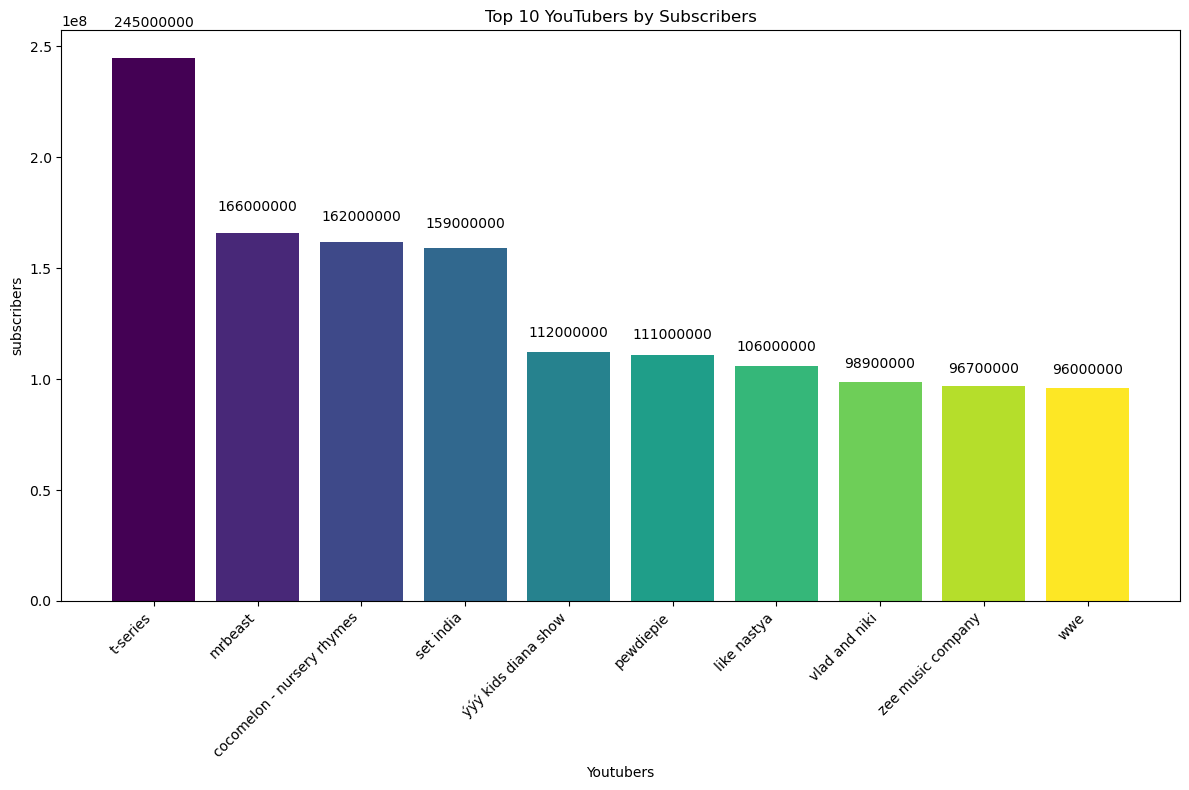

In [21]:
# Sorting by subscribers and select top 10
top_10 = df.sort_values('subscribers', ascending=False).head(10)

# Creating a color palette
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Plot
plt.figure(figsize=(12,8))
bars = plt.bar(top_10['Youtuber'], top_10['subscribers'], color=colors)

# Add labels and title
plt.ylabel('subscribers')
plt.xlabel('Youtubers')
plt.title('Top 10 YouTubers by Subscribers')

# Add a label on top of each bar indicating the number of subscribers
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05*yval, int(yval), ha='center', va='bottom')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


As per Video Views

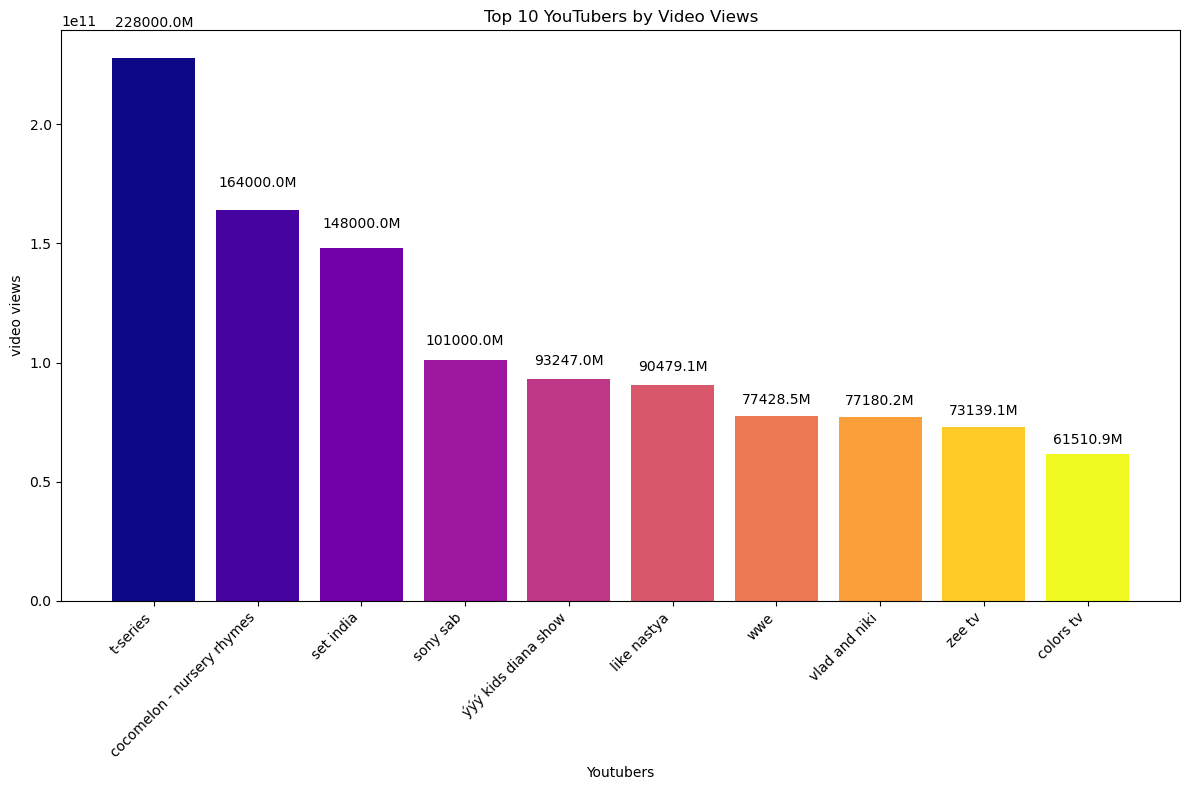

In [22]:
# Sorting by video views and select top 10
top_10_views = df.sort_values('video views', ascending=False).head(10)

# Creating a color palette
colors = plt.cm.plasma(np.linspace(0, 1, 10))

# Plot
plt.figure(figsize=(12,8))
bars = plt.bar(top_10_views['Youtuber'], top_10_views['video views'], color=colors)

# Adding labels and title
plt.ylabel('video views')
plt.xlabel('Youtubers')
plt.title('Top 10 YouTubers by Video Views')

# Adding a label on top of each bar indicating the number of video views in 'M' (millions)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05*yval, f'{yval/1000000:.1f}M', ha='center', va='bottom')

# Rotating x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

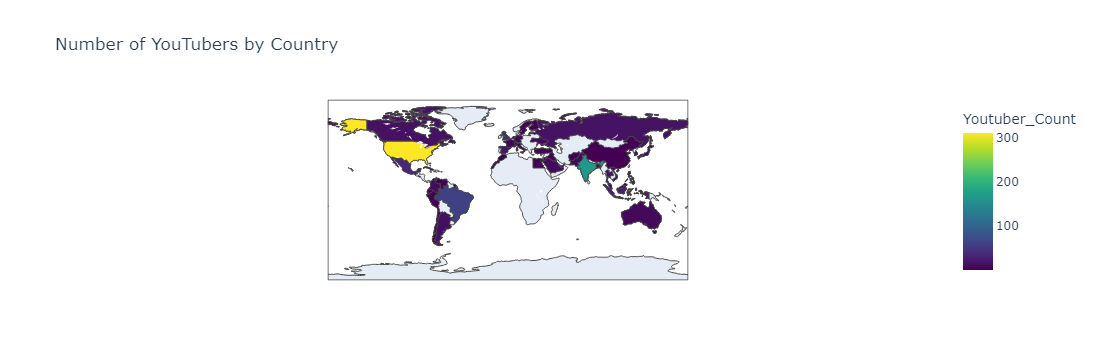

In [23]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Youtuber_Count']

fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Youtuber_Count', 
    hover_name='Country',
    title='Number of YouTubers by Country',
    color_continuous_scale='Viridis',
)

fig.show()

2. Video Views Analysis:
    How do video views correlate with the number of subscribers?
    Do channels with more subscribers generally have more video views?

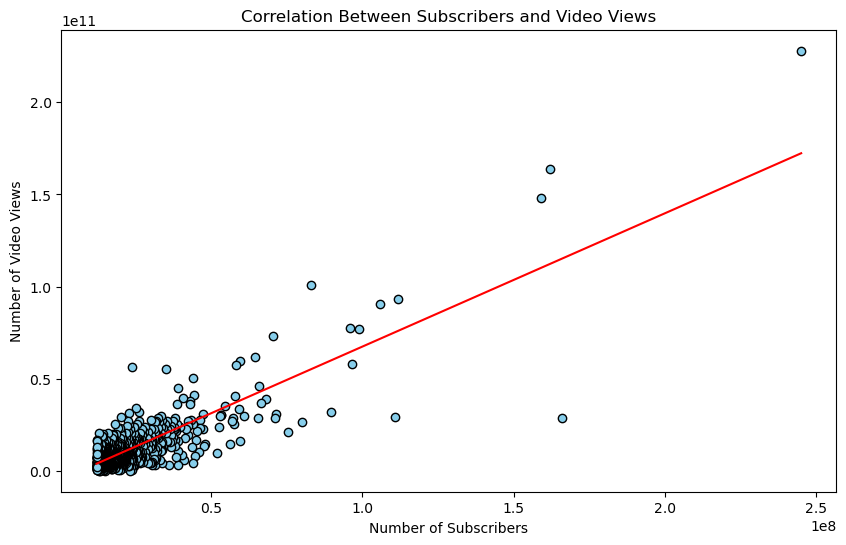

Correlation Coefficient: 0.84


In [24]:
# Defining the data for the scatter plot
x = df['subscribers']
y = df['video views']

# Ploting a scatter plot of the 'subscribers' column versus the 'video views' column
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='skyblue', edgecolor='black')

# Calculating the line of best fit
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(x)

# Ploting the line of best fit
plt.plot(x, ys, color='red')

plt.title('Correlation Between Subscribers and Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Video Views')
plt.show()

# Calculating and print the correlation coefficient
corr_coef = np.corrcoef(x, y)[0,1]
print(f'Correlation Coefficient: {corr_coef:.2f}')

As the graph suggests, Video Views and Subcribers are highly correlated.
And Channels with more subscribers do have more views.

3. Uploads Analysis:
    Is there a relationship between the number of video uploads and the number of subscribers or video views?
    Do channels that upload more videos tend to have more subscribers or views?

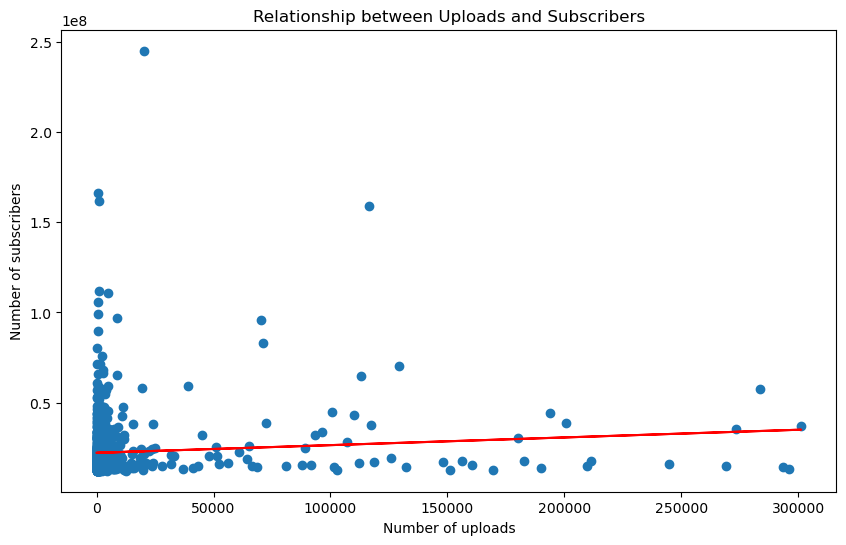

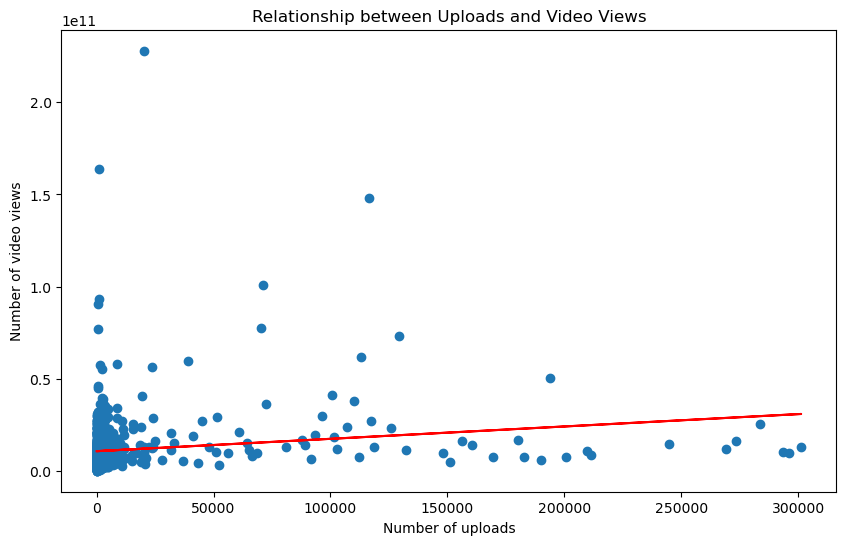

In [25]:
# Ploting the relationship between uploads and subscribers
plt.figure(figsize=(10, 6))
plt.scatter(df['uploads'], df['subscribers'])
plt.xlabel('Number of uploads')
plt.ylabel('Number of subscribers')
plt.title('Relationship between Uploads and Subscribers')

# Calculating the line of best fit for uploads and subscribers
m, b = np.polyfit(df['uploads'], df['subscribers'], 1)
plt.plot(df['uploads'], m*df['uploads'] + b, color='red')

plt.show()

# Ploting the relationship between uploads and video views
plt.figure(figsize=(10, 6))
plt.scatter(df['uploads'], df['video views'])
plt.xlabel('Number of uploads')
plt.ylabel('Number of video views')
plt.title('Relationship between Uploads and Video Views')

# Calculating the line of best fit for uploads and video views
m, b = np.polyfit(df['uploads'], df['video views'], 1)
plt.plot(df['uploads'], m*df['uploads'] + b, color='red')
plt.show()

Video Views and Subscribers are not highly correlated to the number of Uploads. 
The channels that upload more videos, do not necessarily have more subscribers.

4. Category Analysis:
    What are the most common channel type among the top YouTube channels?

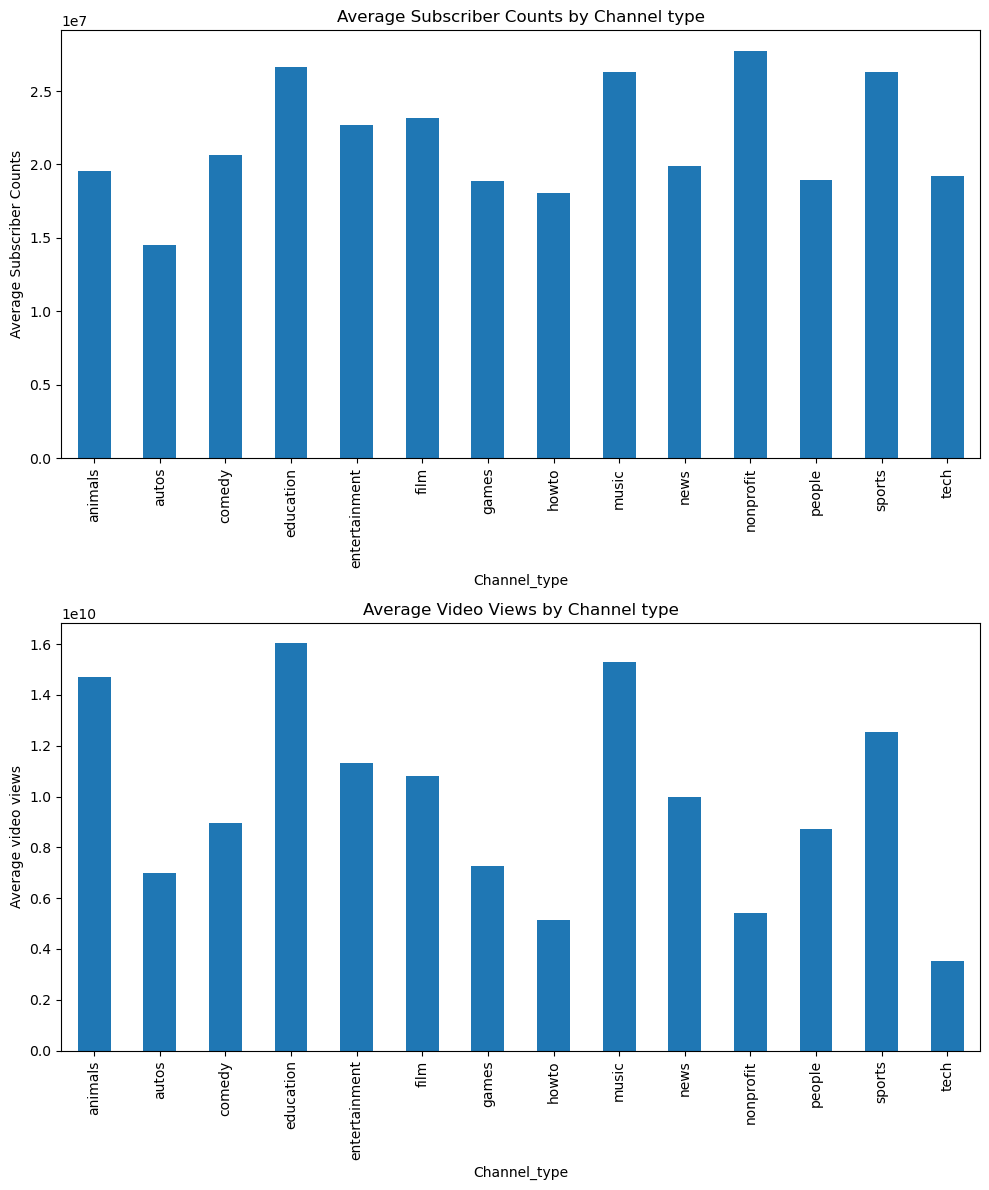

In [26]:
# Calculating average subscribers and video views for each category
avg_subscribers = df.groupby('channel_type')['subscribers'].mean()
avg_video_views = df.groupby('channel_type')['video views'].mean()

# Creating bar plots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Bar plot for subscribers
avg_subscribers.plot(kind='bar', ax=axs[0])
axs[0].set_title('Average Subscriber Counts by Channel type')
axs[0].set_xlabel('Channel_type')
axs[0].set_ylabel('Average Subscriber Counts')

# Bar plot for video views
avg_video_views.plot(kind='bar', ax=axs[1])
axs[1].set_title('Average Video Views by Channel type')
axs[1].set_xlabel('Channel_type')
axs[1].set_ylabel('Average video views')

# Preventing overlapping titles
plt.tight_layout()
plt.show()

5. Subscriber Growth Analysis:
     Is there a correlation between recent subscriber growth and other variables?

subscribers           1.000000
video views           0.835238
uploads               0.090780
AverageYearEarning    0.463955
Name: subscribers, dtype: float64


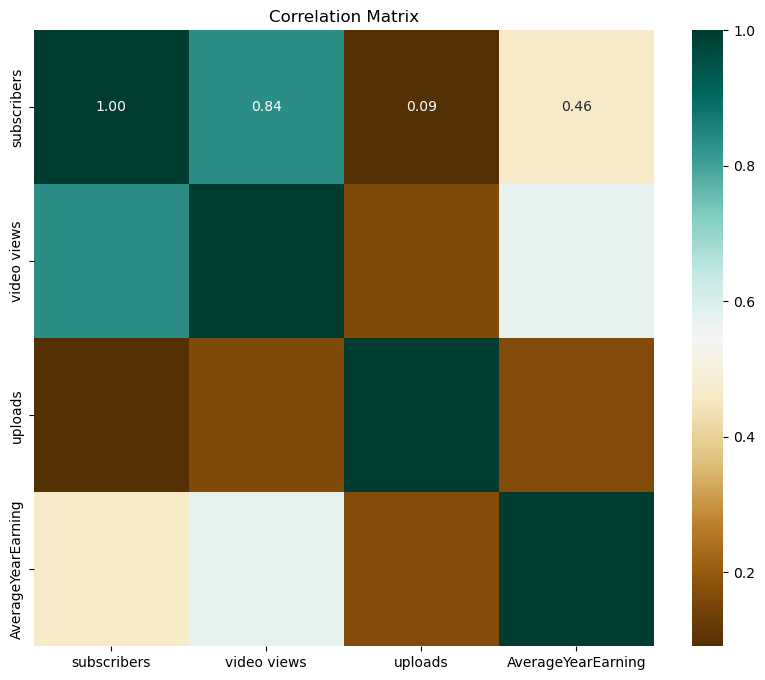

In [27]:
# Create a new variable 'AverageYearEarning'
df['AverageYearEarning'] = (df['highest_yearly_earnings'] + df['lowest_yearly_earnings']) / 2

# Select the specified columns
selected_df = df[['subscribers', 'video views', 'uploads', 'AverageYearEarning']]

# Calculate the correlation matrix
corr_matrix = selected_df.corr()

# Get the correlation of 'Subscribers' with other variables
subscribers_corr = corr_matrix['subscribers']

# Print the correlation
print(subscribers_corr)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BrBG', cbar=True)
plt.title('Correlation Matrix')
plt.show()

6. Geographic Distribution:
     How does the urban population of a country correlate with the number of popular YouTube channels?


Top 10 countries with the highest number of top-ranking YouTube channels:
          Country  Top_Ranking_Channel_Count
0   united states                        311
1           india                        166
2          brazil                         62
3  united kingdom                         43
4          mexico                         33
5       indonesia                         28
6           spain                         21
7        thailand                         18
8     south korea                         17
9          russia                         16

Aggregated urban population data by country:
       Country  Urban_population
0  afghanistan         9797273.0
1      andorra               NaN
2    argentina        41339571.0
3    australia        21844756.0
4   bangladesh        60987417.0

Merged data:
          Country  Top_Ranking_Channel_Count  Urban_population
0   united states                        311       270663028.0
1           india                        166  

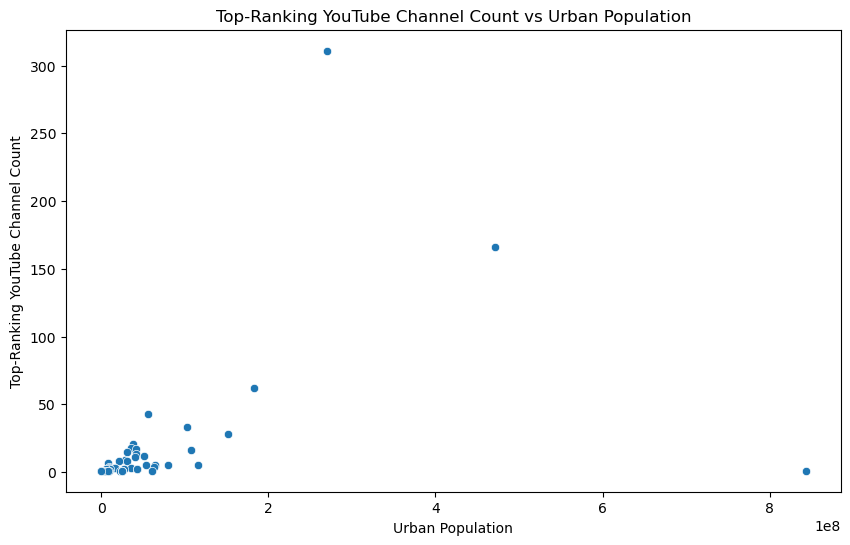

In [28]:
# Aggregate the number of top-ranking YouTube channels per country
country_channel_counts = df['Country'].value_counts().reset_index()
country_channel_counts.columns = ['Country', 'Top_Ranking_Channel_Count']

# Display the top 10 countries with the highest number of top-ranking YouTube channels
print("\nTop 10 countries with the highest number of top-ranking YouTube channels:")
print(country_channel_counts.head(10))

# Group by country and aggregate urban population
urban_population_data = df.groupby('Country')[['Urban_population']].mean().reset_index()

# Display the aggregated urban population data
print("\nAggregated urban population data by country:")
print(urban_population_data.head())

# Merge the channel counts with the urban population data
merged_data = pd.merge(country_channel_counts, urban_population_data, on='Country')

# Display the merged data
print("\nMerged data:")
print(merged_data.head())

# Calculate the correlation between urban population and top-ranking YouTube channels
correlation = merged_data['Top_Ranking_Channel_Count'].corr(merged_data['Urban_population'])

# Display the correlation
print(f"\nCorrelation between urban population and the number of top-ranking YouTube channels: {correlation}")

# Visualize the correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Urban_population', y='Top_Ranking_Channel_Count')
plt.title('Top-Ranking YouTube Channel Count vs Urban Population')
plt.xlabel('Urban Population')
plt.ylabel('Top-Ranking YouTube Channel Count')
plt.show()

7. Economic Correlation:
    Is there a relationship between a country's unemployment rate and the number of popular YouTube channels?
    How does the gross tertiary education enrollment rate in a country correlate with the success of YouTube channels?


Top 10 countries with the highest number of top-ranking YouTube channels:
          Country  Top_Ranking_Channel_Count
0   united states                        311
1           india                        166
2          brazil                         62
3  united kingdom                         43
4          mexico                         33
5       indonesia                         28
6           spain                         21
7        thailand                         18
8     south korea                         17
9          russia                         16

Aggregated economic data by country:
       Country  Unemployment rate  Gross tertiary education enrollment (%)
0  afghanistan              11.12                                      9.7
1      andorra                NaN                                      NaN
2    argentina               9.79                                     90.0
3    australia               5.27                                    113.1
4   bangladesh   

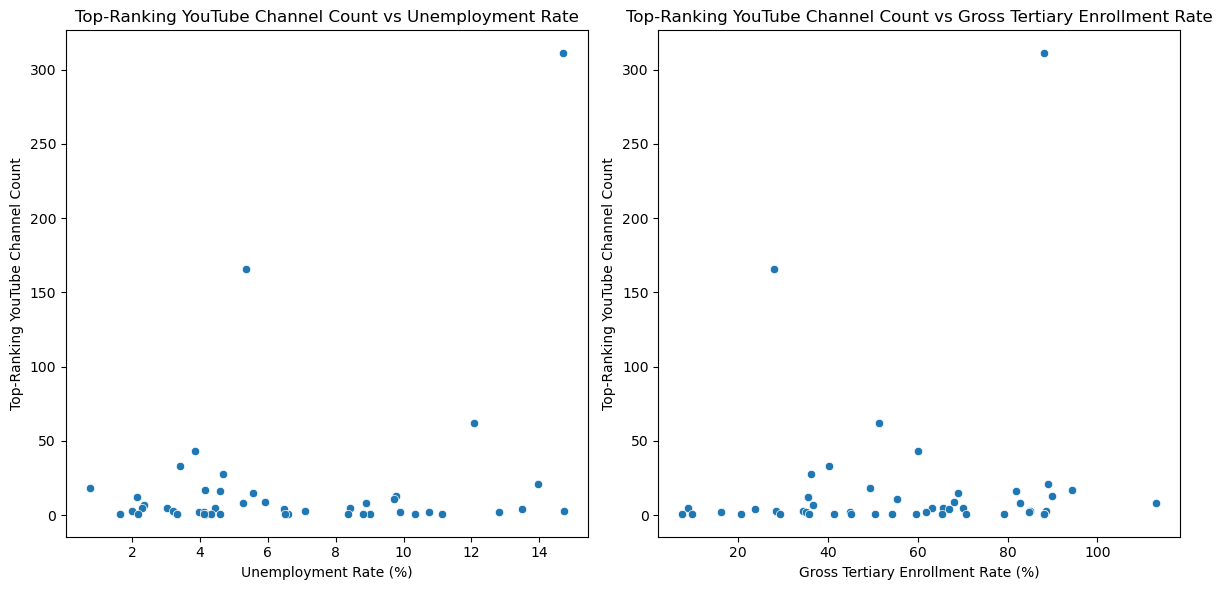

In [30]:
# Aggregate the number of top-ranking YouTube channels per country
country_channel_counts = df['Country'].value_counts().reset_index()
country_channel_counts.columns = ['Country', 'Top_Ranking_Channel_Count']

# Display the top 10 countries with the highest number of top-ranking YouTube channels
print("\nTop 10 countries with the highest number of top-ranking YouTube channels:")
print(country_channel_counts.head(10))

# Group by country and aggregate unemployment rate and gross tertiary education enrollment rate
economic_data = df.groupby('Country')[['Unemployment rate', 'Gross tertiary education enrollment (%)']].mean().reset_index()

# Display the aggregated economic data
print("\nAggregated economic data by country:")
print(economic_data.head())

# Merge the channel counts with the economic data
merged_data = pd.merge(country_channel_counts, economic_data, on='Country')

# Display the merged data
print("\nMerged data:")
print(merged_data.head())

# Calculate the correlation between unemployment rate and top-ranking YouTube channels
unemployment_correlation = merged_data['Top_Ranking_Channel_Count'].corr(merged_data['Unemployment rate'])
print(f"\nCorrelation between unemployment rate and the number of top-ranking YouTube channels: {unemployment_correlation}")

# Calculate the correlation between gross tertiary enrollment rate and top-ranking YouTube channels
education_correlation = merged_data['Top_Ranking_Channel_Count'].corr(merged_data['Gross tertiary education enrollment (%)'])
print(f"\nCorrelation between gross tertiary enrollment rate and the number of top-ranking YouTube channels: {education_correlation}")

# Visualize the correlation between unemployment rate and top-ranking YouTube channels using a scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_data, x='Unemployment rate', y='Top_Ranking_Channel_Count')
plt.title('Top-Ranking YouTube Channel Count vs Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Top-Ranking YouTube Channel Count')

# Visualize the correlation between gross tertiary enrollment rate and top-ranking YouTube channels using a scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_data, x='Gross tertiary education enrollment (%)', y='Top_Ranking_Channel_Count')
plt.title('Top-Ranking YouTube Channel Count vs Gross Tertiary Enrollment Rate')
plt.xlabel('Gross Tertiary Enrollment Rate (%)')
plt.ylabel('Top-Ranking YouTube Channel Count')

plt.tight_layout()
plt.show()

8. Channel Growth and Trends:
     How has the creation date of top YouTube channels evolved over time?


First few rows with parsed creation date:
    channel_type  created_year
0          music        2006.0
1  entertainment        2012.0
2      education        2006.0
3  entertainment        2006.0
4  entertainment        2015.0

Number of top-ranking YouTube channels created each year:
     Year  Number_of_Channels
0  1970.0                   1
1  2005.0                  20
2  2006.0                  76
3  2007.0                  42
4  2008.0                  43
5  2009.0                  49
6  2010.0                  43
7  2011.0                  78
8  2012.0                  63
9  2013.0                  66


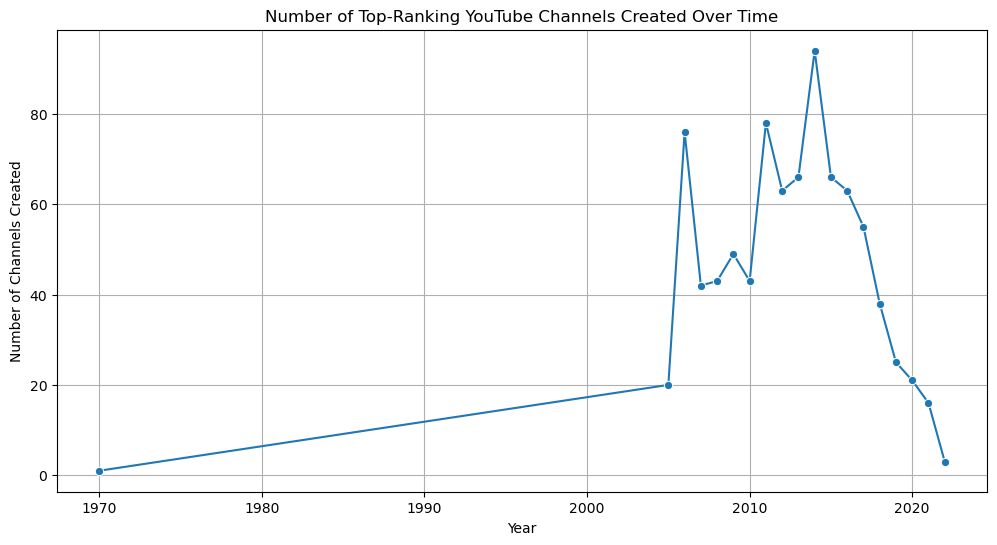

In [32]:
# Parse the creation date and extract the year
df['Creation_Date'] = pd.to_datetime(df['created_year'], errors='coerce')


# Display the first few rows to verify the new columns
print("\nFirst few rows with parsed creation date:")
print(df[['channel_type', 'created_year']].head())

# Aggregate the number of channels created each year
channels_per_year = df['created_year'].value_counts().sort_index().reset_index()
channels_per_year.columns = ['Year', 'Number_of_Channels']

# Display the aggregated data
print("\nNumber of top-ranking YouTube channels created each year:")
print(channels_per_year.head(10))

# Visualize the trend using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=channels_per_year, x='Year', y='Number_of_Channels', marker='o')
plt.title('Number of Top-Ranking YouTube Channels Created Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')
plt.grid(True)
plt.show()

9. Additional Insights:
     Are there any patterns or clusters of popular YouTube channels based on geographic location (latitude and longitude)?
     What trends can be observed from the data regarding the overall growth of YouTube as a platform?


Geographic data:
    channel_type        Country   Latitude  Longitude
0          music          india  20.593684  78.962880
1  entertainment  united states  37.090240 -95.712891
2      education  united states  37.090240 -95.712891
3  entertainment          india  20.593684  78.962880
4  entertainment  united states  37.090240 -95.712891


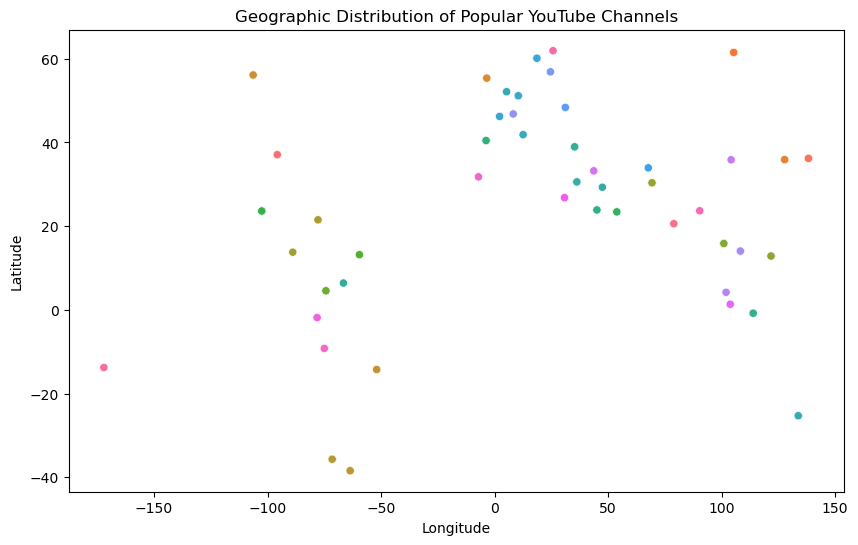

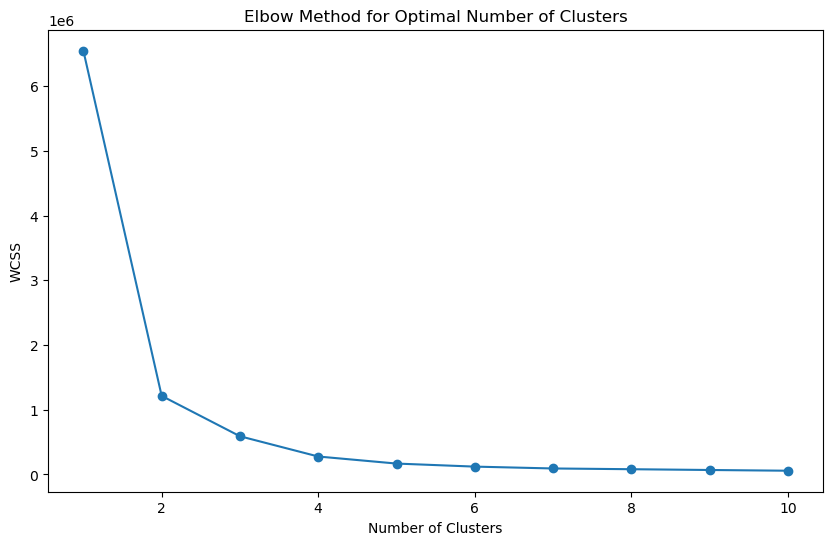

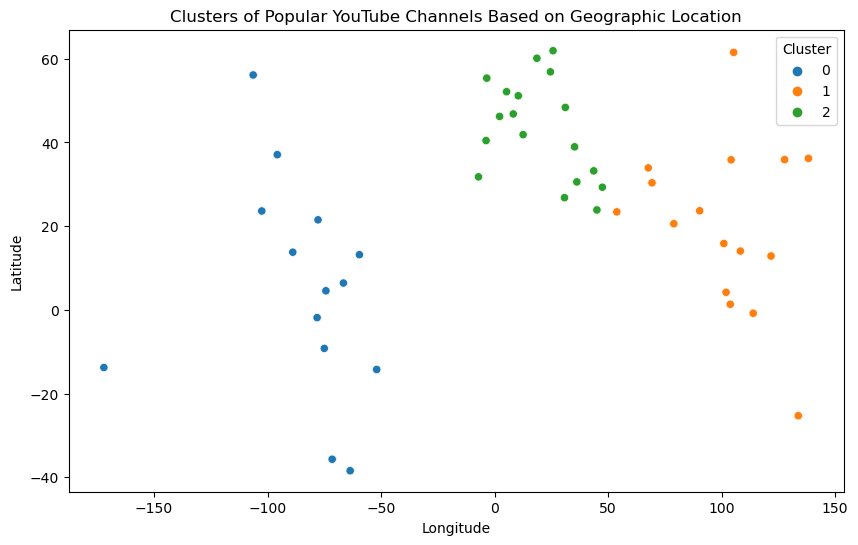


Number of channels in each cluster:
   Cluster  Number_of_Channels
0        0                 456
1        1                 291
2        2                 116


In [33]:
# Extract latitude and longitude columns (assuming they exist)
geographic_data = df[['channel_type', 'Country', 'Latitude', 'Longitude']]

# Drop rows with missing geographic data
geographic_data = geographic_data.dropna(subset=['Latitude', 'Longitude'])

# Display the first few rows of geographic data
print("\nGeographic data:")
print(geographic_data.head())

# Visualize the geographic distribution of popular YouTube channels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geographic_data, x='Longitude', y='Latitude', hue='Country', legend=False)
plt.title('Geographic Distribution of Popular YouTube Channels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Prepare data for clustering
geographic_coords = geographic_data[['Latitude', 'Longitude']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(geographic_coords)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
geographic_data['Cluster'] = kmeans.fit_predict(geographic_coords)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geographic_data, x='Longitude', y='Latitude', hue='Cluster', palette='tab10')
plt.title('Clusters of Popular YouTube Channels Based on Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Analyze the number of channels in each cluster
cluster_counts = geographic_data['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Number_of_Channels']

# Display the number of channels in each cluster
print("\nNumber of channels in each cluster:")
print(cluster_counts)

# Visualize the number of channels in each cluster
